# Baseline: Reflex Control

Steers the car using a PD controller on the estimated $y_m$ track median offset.

In [1]:
from DriveItGym import *
import numpy as np
from numpy import pi

num_episodes = 1  # number of episodes to run
time_limit = 10.0
throttle_limit = 0.75
gamma = 0.98
epsilon = 0.1
kp, kv = 1.0, 0.3
random_position=False

env = DriveItEnv(time_limit, throttle_limit, gamma, show_belief_state=True, trail_length=3.3)
observation = env._reset(random_position)
ym_ = 0.0
done = False
reward_episode = 0
reward_sum = 0.0
crashes = 0
err = []; obs = []

for i_episode in range(1, num_episodes + 1):
    while not done:
        if num_episodes < 2:
            env.render()

        xm, ym, theta, steer, v = observation
        dym = ym - ym_
        ym_ = ym
        f = steer + kp * ym + kv * dym / dt
        if f > epsilon: action = 2
        elif f < -epsilon: action = 1
        else: action = 0
            
        if v < 2.5:
            action += 3
            
        s = env.state
        sn = env._normalize((s[5], s[6], s[2], 0, s[4]*v_max))
        e = (xm-sn[0], ym-sn[1], theta-sn[2], 0, v-sn[4])
        err.append(e)
        obs.append(observation)

        observation, reward, done, info = env.step(action)
        reward_episode += reward
        #reward_sum = reward + gamma * reward_sum

    if num_episodes <= 10:
        print('Episode %d %s. reward: %f, laps: %f' % \
              (i_episode, info['done'], reward_episode, \
               reward_episode / lap_median_length))

    if info['done'] != 'complete':
        crashes += 1

    reward_sum += reward_episode
    reward_episode = 0
    observation = env._reset(random_position)
    done = False

if num_episodes > 1:
    print('Average reward: %f with %d crashes' % \
          (reward_sum / num_episodes, crashes))

Episode 1 complete. reward: 15.492706, laps: 3.077435


In [11]:
env.close()

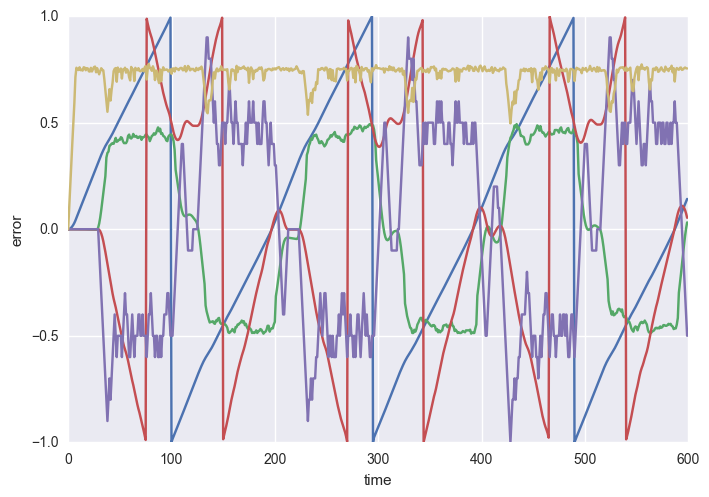

In [3]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('ggplot')
%matplotlib inline
sns.set()
plt.plot([o for o in obs])
plt.xlabel('time');plt.ylabel('error')

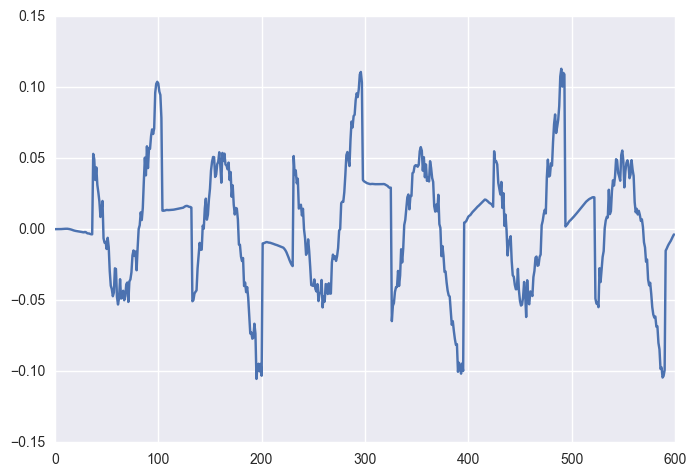

In [5]:
i = 1
plt.plot([e[i] if abs(e[i])<1.0 else 0 for e in err])
#plt.plot([o[i] for o in obs])

In [6]:
env._reset(random_position)

array([ 0.,  0.,  0.,  0.,  0.])

In [7]:
env.render()

In [22]:
# out penalty = max discounted reward for median laps at full speed
rmax = throttle_limit * v_max * dt / (1 - gamma)
rmax

2.0833333333333313